# Bank marketing use case | Model creation
## 0. Setup with logging


In this Notebook, we will see together what kind of information can be logged in the case of a model training. To do so, we will explore how our logistic regression was built.

In [ ]:
import sys
sys.path.append("..")

In [ ]:
import kensu.pandas as pd
import kensu.numpy as np
from kensu.sklearn.linear_model import LogisticRegression
from kensu.sklearn.model_selection import train_test_split
from kensu.sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from utils import create_observability_report

In [ ]:
from kensu.utils.kensu_provider import KensuProvider
kensu = KensuProvider().initKensu(process_name='Exercise 6',
                            user_name='Sammy', 
                            code_location='https://gitlab.example.com', 
                            init_context=True, 
                            project_names=['O-Reilly'], 
                            environment="Production",
                            report_to_file=True,
                            offline_file_name='log_model_example.log')

## 1. Data Preparation

The data preparation is applied on a training set, we see that not all features are used in the model.

In [ ]:
data = pd.read_csv('../data/training_set.csv')

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

cat = [i for i in ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'] if i in data.columns]

data_dummy = pd.get_dummies(data,columns=cat)

features=[i for i in ['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 
  'month_apr', 'month_aug', 'month_jul', 'month_jun', 'month_mar', 
  'month_may', 'month_nov', 'month_oct', "poutcome_success","y"] if i in data_dummy.columns]

data_final = data_dummy[features]

## 2. Training of the model

Here, we train the model on a subset of the `data_final` dataset.
We will evaluate the performance of the model as well on the traning set as on the test set. 
Finally, we save the model in a pickle file. 

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(classification_report(y_train, logreg.predict(X_train)))
print(classification_report(y_test, logreg.predict(X_test)))

In [ ]:
import kensu.pickle as pk
pk.dump(logreg,open('model_t2.cav','wb'))

## 3. Creation of the report

In [ ]:
create_observability_report('log_model_example.log','Report-model-example.pdf')

In [ ]:
!cat log_model_example.log

### What is new?

You can observe in the log file and in the report that we have collected new pieces of information:
- The name of the model method
- The metrics computed on the training set 

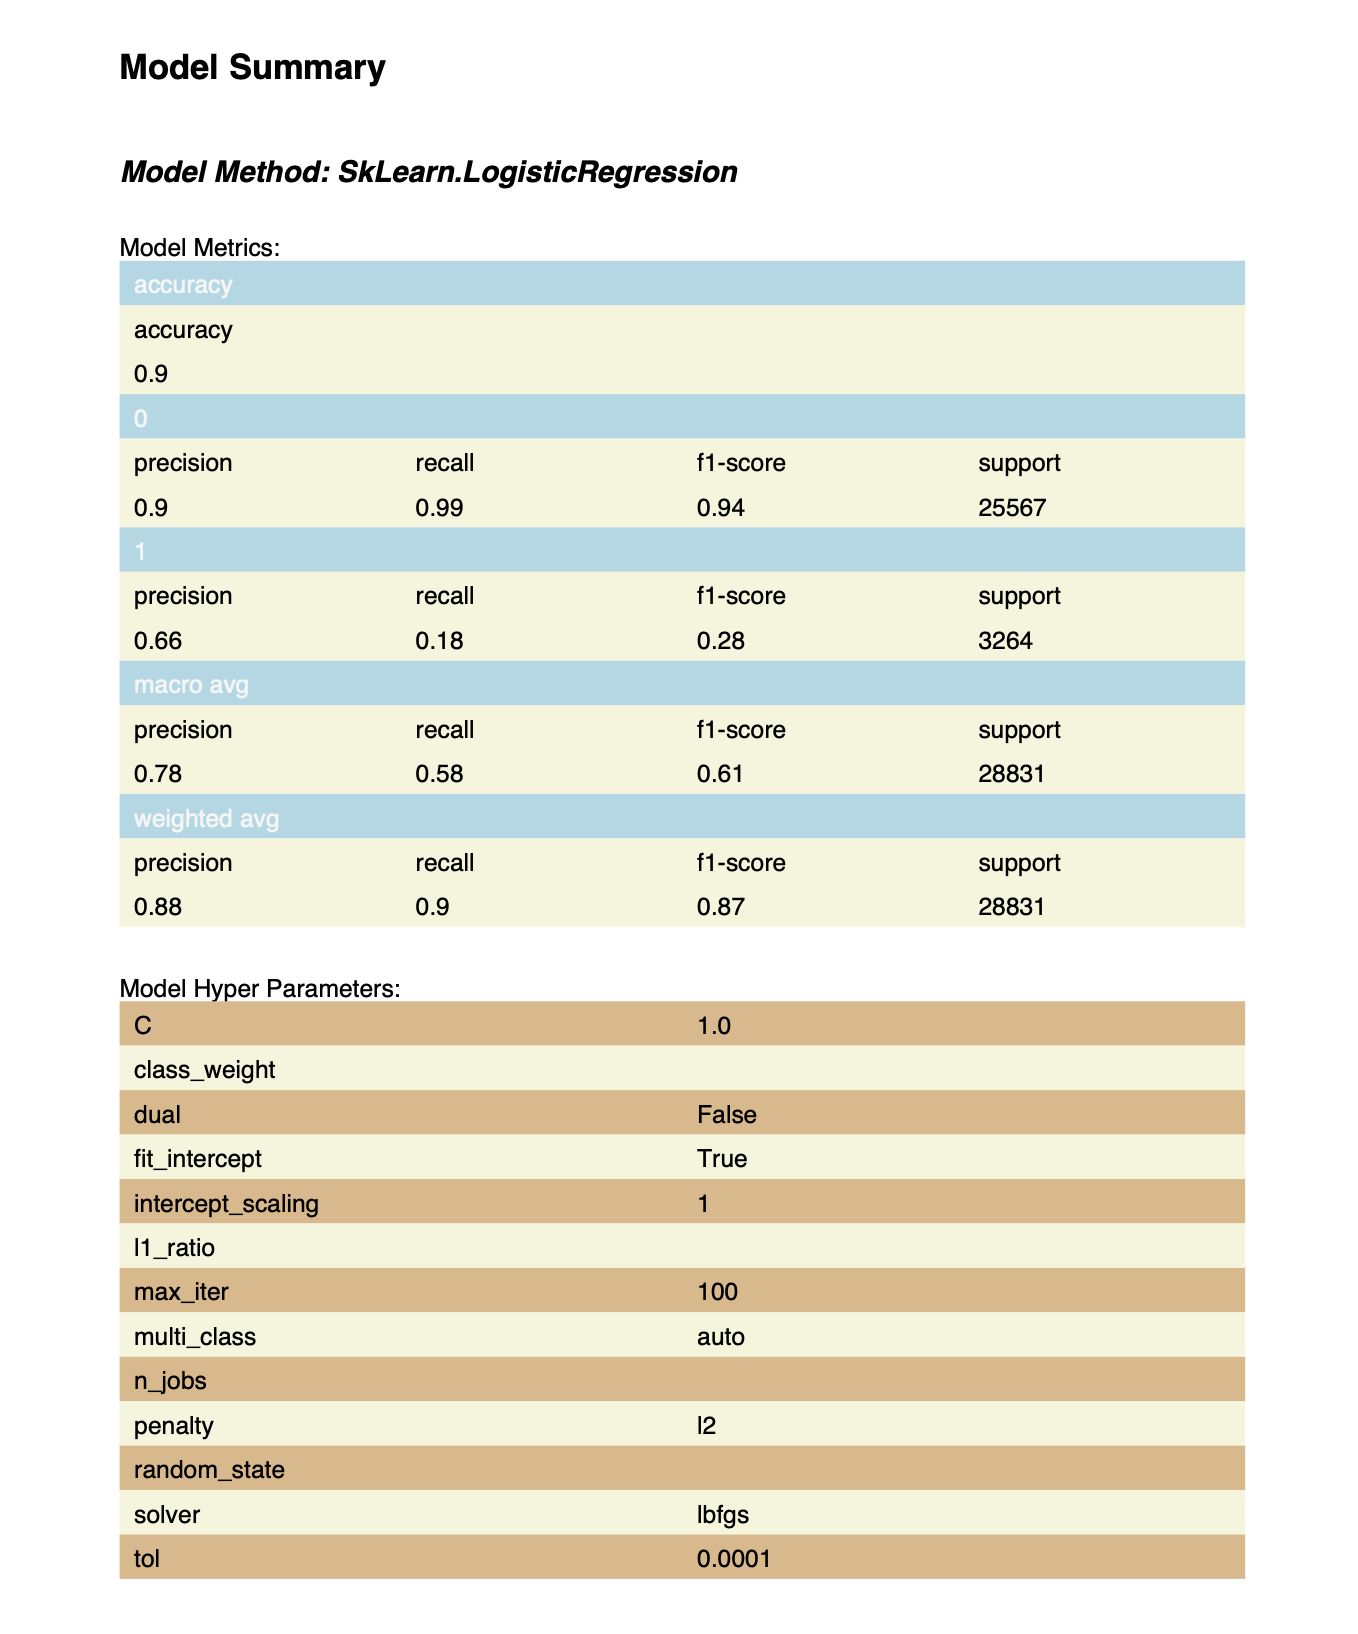

In the report, you will also find information on how the model was created, such as:
- The fields that were used to train the model
- The state of the gold matrix at the time of training (statistics)








